1. Sample code

In [32]:
#Ignoring TF warning messages
import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

In [33]:
#
import numpy as np 
import matplotlib.pyplot as plt
 
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import Dropout 
from keras.layers import Flatten 
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.utils import to_categorical

import itertools 
seed = 7 
np.random.seed(seed) 

# load data 
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# reshape to be [samples][channels][width][height] 
X_train = X_train.reshape(X_train.shape[0], 28, 28,1).astype( 'float32' ) 
X_test = X_test.reshape(X_test.shape[0], 28, 28,1).astype( 'float32' ) 

# normalize inputs from 0-255 to 0-1 
X_train = X_train / 255 
X_test = X_test / 255

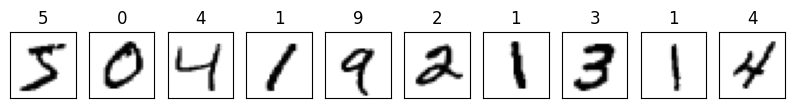

In [34]:
# one hot encode outputs 
y_train = to_categorical(y_train) 
y_test = to_categorical(y_test) 
num_classes = y_test.shape[1] 
(x_train, y_train1), (x_test, y_test1) = mnist.load_data() 
fig, ax = plt.subplots(1, 10, figsize=(10,10)) 
for i in range(0, 10): 
	ax[i].xaxis.set_visible(False) 
	ax[i].yaxis.set_visible(False) 
	ax[i].set_title(y_train1[i]) 
	ax[i].imshow(x_train[i], cmap=plt.cm.binary) 

def baseline_model(): 
	# create model 
	model = Sequential() 
	model.add(Convolution2D(32, (5, 5), padding= 'valid' ,strides=(1,1), input_shape=( 28, 28,1), activation= 'relu' )) 
	model.add(MaxPooling2D(pool_size=(2, 2))) 
	model.add(Dropout(0.2)) 
	model.add(Flatten()) 
	model.add(Dense(1152, activation= 'relu' )) 
	model.add(Dense(128, activation= 'relu' )) 
	model.add(Dense(10, activation= 'softmax' )) 
	
 	# Compile model 
	model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ]) 
	return model 

In [35]:
model = baseline_model() 
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2) 
scores = model.evaluate(X_test, y_test, verbose=0) 
print("CNN Error: %.2f%%" % (100-scores[1]*100)) #

Epoch 1/10
300/300 - 5s - loss: 0.1696 - accuracy: 0.9491 - val_loss: 0.0502 - val_accuracy: 0.9836 - 5s/epoch - 17ms/step
Epoch 2/10
300/300 - 2s - loss: 0.0490 - accuracy: 0.9848 - val_loss: 0.0388 - val_accuracy: 0.9875 - 2s/epoch - 7ms/step
Epoch 3/10
300/300 - 2s - loss: 0.0331 - accuracy: 0.9897 - val_loss: 0.0343 - val_accuracy: 0.9884 - 2s/epoch - 7ms/step
Epoch 4/10
300/300 - 2s - loss: 0.0237 - accuracy: 0.9923 - val_loss: 0.0336 - val_accuracy: 0.9904 - 2s/epoch - 6ms/step
Epoch 5/10
300/300 - 2s - loss: 0.0174 - accuracy: 0.9942 - val_loss: 0.0391 - val_accuracy: 0.9884 - 2s/epoch - 6ms/step
Epoch 6/10
300/300 - 2s - loss: 0.0133 - accuracy: 0.9953 - val_loss: 0.0341 - val_accuracy: 0.9902 - 2s/epoch - 6ms/step
Epoch 7/10
300/300 - 2s - loss: 0.0129 - accuracy: 0.9955 - val_loss: 0.0376 - val_accuracy: 0.9895 - 2s/epoch - 6ms/step
Epoch 8/10
300/300 - 2s - loss: 0.0107 - accuracy: 0.9963 - val_loss: 0.0300 - val_accuracy: 0.9917 - 2s/epoch - 6ms/step
Epoch 9/10
300/300 - 2s

2. Change in stride and padding

In [36]:
# load data 
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# reshape to be [samples][channels][width][height] 
X_train = X_train.reshape(X_train.shape[0], 28, 28,1).astype( 'float32' ) 
X_test = X_test.reshape(X_test.shape[0], 28, 28,1).astype( 'float32' ) 

# normalize inputs from 0-255 to 0-1 
X_train = X_train / 255 
X_test = X_test / 255

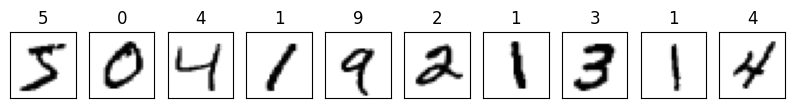

In [37]:
# one hot encode outputs 
y_train = to_categorical(y_train) 
y_test = to_categorical(y_test) 
num_classes = y_test.shape[1] 
(x_train, y_train1), (x_test, y_test1) = mnist.load_data() 
fig, ax = plt.subplots(1, 10, figsize=(10,10)) 
for i in range(0, 10): 
	ax[i].xaxis.set_visible(False) 
	ax[i].yaxis.set_visible(False) 
	ax[i].set_title(y_train1[i]) 
	ax[i].imshow(x_train[i], cmap=plt.cm.binary) 

def baseline_model(): 
	# create model 
	model = Sequential() 
	model.add(Convolution2D(32, (5, 5), padding= 'same' ,strides=(2,2), input_shape=( 28, 28,1), activation= 'relu' )) 
	model.add(MaxPooling2D(pool_size=(2, 2))) 
	model.add(Dropout(0.2)) 
	model.add(Flatten()) 
	model.add(Dense(1152, activation= 'relu' )) 
	model.add(Dense(128, activation= 'relu' )) 
	model.add(Dense(10, activation= 'softmax' )) 
	
 	# Compile model 
	model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ]) 
	return model 

In [38]:
model = baseline_model() 
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2) 
scores = model.evaluate(X_test, y_test, verbose=0) 
print("CNN Error: %.2f%%" % (100-scores[1]*100)) #

Epoch 1/10
300/300 - 4s - loss: 0.2446 - accuracy: 0.9269 - val_loss: 0.0697 - val_accuracy: 0.9783 - 4s/epoch - 12ms/step
Epoch 2/10
300/300 - 2s - loss: 0.0730 - accuracy: 0.9769 - val_loss: 0.0518 - val_accuracy: 0.9822 - 2s/epoch - 6ms/step
Epoch 3/10
300/300 - 2s - loss: 0.0495 - accuracy: 0.9844 - val_loss: 0.0385 - val_accuracy: 0.9870 - 2s/epoch - 5ms/step
Epoch 4/10
300/300 - 2s - loss: 0.0405 - accuracy: 0.9868 - val_loss: 0.0330 - val_accuracy: 0.9887 - 2s/epoch - 6ms/step
Epoch 5/10
300/300 - 2s - loss: 0.0283 - accuracy: 0.9909 - val_loss: 0.0320 - val_accuracy: 0.9893 - 2s/epoch - 6ms/step
Epoch 6/10
300/300 - 2s - loss: 0.0242 - accuracy: 0.9920 - val_loss: 0.0324 - val_accuracy: 0.9888 - 2s/epoch - 5ms/step
Epoch 7/10
300/300 - 2s - loss: 0.0220 - accuracy: 0.9922 - val_loss: 0.0315 - val_accuracy: 0.9898 - 2s/epoch - 5ms/step
Epoch 8/10
300/300 - 2s - loss: 0.0158 - accuracy: 0.9946 - val_loss: 0.0358 - val_accuracy: 0.9887 - 2s/epoch - 5ms/step
Epoch 9/10
300/300 - 2s

3. Removing Maxpooling

In [39]:
# load data 
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# reshape to be [samples][channels][width][height] 
X_train = X_train.reshape(X_train.shape[0], 28, 28,1).astype( 'float32' ) 
X_test = X_test.reshape(X_test.shape[0], 28, 28,1).astype( 'float32' ) 

# normalize inputs from 0-255 to 0-1 
X_train = X_train / 255 
X_test = X_test / 255 

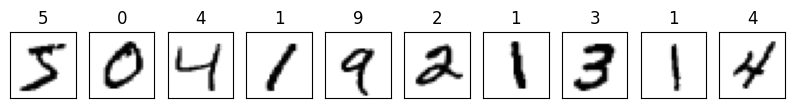

In [40]:
# one hot encode outputs 
y_train = to_categorical(y_train) 
y_test = to_categorical(y_test) 
num_classes = y_test.shape[1] 
(x_train, y_train1), (x_test, y_test1) = mnist.load_data() 
fig, ax = plt.subplots(1, 10, figsize=(10,10)) 
for i in range(0, 10): 
	ax[i].xaxis.set_visible(False) 
	ax[i].yaxis.set_visible(False) 
	ax[i].set_title(y_train1[i]) 
	ax[i].imshow(x_train[i], cmap=plt.cm.binary) 

def baseline_model(): 
	# create model 
	model = Sequential() 
	model.add(Convolution2D(32, (5, 5), padding= 'valid' ,strides=(1,1), input_shape=( 28, 28,1), activation= 'relu' )) 
	model.add(Dropout(0.2)) 
	model.add(Flatten()) 
	model.add(Dense(1152, activation= 'relu' )) 
	model.add(Dense(128, activation= 'relu' )) 
	model.add(Dense(10, activation= 'softmax' )) 
	
 	# Compile model 
	model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ]) 
	return model 

In [41]:
model = baseline_model() 
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2) 
scores = model.evaluate(X_test, y_test, verbose=0) 
print("CNN Error: %.2f%%" % (100-scores[1]*100)) #

Epoch 1/10
300/300 - 5s - loss: 0.1551 - accuracy: 0.9516 - val_loss: 0.0564 - val_accuracy: 0.9822 - 5s/epoch - 18ms/step
Epoch 2/10
300/300 - 4s - loss: 0.0439 - accuracy: 0.9863 - val_loss: 0.0512 - val_accuracy: 0.9842 - 4s/epoch - 12ms/step
Epoch 3/10
300/300 - 4s - loss: 0.0236 - accuracy: 0.9920 - val_loss: 0.0409 - val_accuracy: 0.9869 - 4s/epoch - 12ms/step
Epoch 4/10
300/300 - 3s - loss: 0.0131 - accuracy: 0.9958 - val_loss: 0.0375 - val_accuracy: 0.9888 - 3s/epoch - 12ms/step
Epoch 5/10
300/300 - 4s - loss: 0.0111 - accuracy: 0.9962 - val_loss: 0.0562 - val_accuracy: 0.9851 - 4s/epoch - 12ms/step
Epoch 6/10
300/300 - 3s - loss: 0.0106 - accuracy: 0.9964 - val_loss: 0.0478 - val_accuracy: 0.9855 - 3s/epoch - 12ms/step
Epoch 7/10
300/300 - 3s - loss: 0.0079 - accuracy: 0.9975 - val_loss: 0.0518 - val_accuracy: 0.9855 - 3s/epoch - 12ms/step
Epoch 8/10
300/300 - 4s - loss: 0.0080 - accuracy: 0.9973 - val_loss: 0.0475 - val_accuracy: 0.9876 - 4s/epoch - 12ms/step
Epoch 9/10
300/3

4. Change activation function

In [42]:
# load data 
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# reshape to be [samples][channels][width][height] 
X_train = X_train.reshape(X_train.shape[0], 28, 28,1).astype( 'float32' ) 
X_test = X_test.reshape(X_test.shape[0], 28, 28,1).astype( 'float32' ) 

# normalize inputs from 0-255 to 0-1 
X_train = X_train / 255 
X_test = X_test / 255 

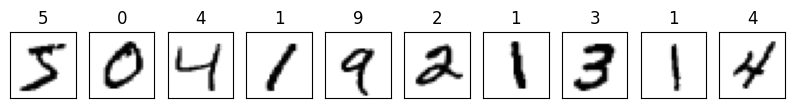

In [43]:
# one hot encode outputs 
y_train = to_categorical(y_train) 
y_test = to_categorical(y_test) 
num_classes = y_test.shape[1] 
(x_train, y_train1), (x_test, y_test1) = mnist.load_data() 
fig, ax = plt.subplots(1, 10, figsize=(10,10)) 
for i in range(0, 10): 
	ax[i].xaxis.set_visible(False) 
	ax[i].yaxis.set_visible(False) 
	ax[i].set_title(y_train1[i]) 
	ax[i].imshow(x_train[i], cmap=plt.cm.binary) 

def baseline_model(): 
	# create model 
	model = Sequential() 
	model.add(Convolution2D(32, (5, 5), padding= 'valid' ,strides=(1,1), input_shape=( 28, 28,1), activation= 'relu' )) 
	model.add(MaxPooling2D(pool_size=(2, 2))) 
	model.add(Dropout(0.2)) 
	model.add(Flatten()) 
	model.add(Dense(1152, activation= 'tanh' )) 
	model.add(Dense(128, activation= 'sigmoid' )) 
	model.add(Dense(10, activation= 'softmax' )) 
	
 	# Compile model 
	model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ]) 
	return model 

In [44]:
model = baseline_model() 
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2) 
scores = model.evaluate(X_test, y_test, verbose=0) 
print("CNN Error: %.2f%%" % (100-scores[1]*100)) #

Epoch 1/10
300/300 - 4s - loss: 0.2154 - accuracy: 0.9419 - val_loss: 0.0760 - val_accuracy: 0.9782 - 4s/epoch - 12ms/step
Epoch 2/10
300/300 - 2s - loss: 0.0638 - accuracy: 0.9819 - val_loss: 0.0508 - val_accuracy: 0.9851 - 2s/epoch - 7ms/step
Epoch 3/10
300/300 - 2s - loss: 0.0446 - accuracy: 0.9866 - val_loss: 0.0542 - val_accuracy: 0.9839 - 2s/epoch - 7ms/step
Epoch 4/10
300/300 - 2s - loss: 0.0314 - accuracy: 0.9909 - val_loss: 0.0347 - val_accuracy: 0.9894 - 2s/epoch - 7ms/step
Epoch 5/10
300/300 - 2s - loss: 0.0256 - accuracy: 0.9924 - val_loss: 0.0326 - val_accuracy: 0.9886 - 2s/epoch - 7ms/step
Epoch 6/10
300/300 - 2s - loss: 0.0209 - accuracy: 0.9938 - val_loss: 0.0343 - val_accuracy: 0.9892 - 2s/epoch - 7ms/step
Epoch 7/10
300/300 - 2s - loss: 0.0153 - accuracy: 0.9953 - val_loss: 0.0289 - val_accuracy: 0.9904 - 2s/epoch - 6ms/step
Epoch 8/10
300/300 - 2s - loss: 0.0121 - accuracy: 0.9963 - val_loss: 0.0379 - val_accuracy: 0.9881 - 2s/epoch - 7ms/step
Epoch 9/10
300/300 - 2s

5. Adding multiple dense layers

In [45]:
# load data 
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# reshape to be [samples][channels][width][height] 
X_train = X_train.reshape(X_train.shape[0], 28, 28,1).astype( 'float32' ) 
X_test = X_test.reshape(X_test.shape[0], 28, 28,1).astype( 'float32' ) 

# normalize inputs from 0-255 to 0-1 
X_train = X_train / 255 
X_test = X_test / 255 

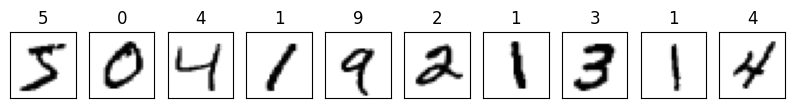

In [46]:
# one hot encode outputs 
y_train = to_categorical(y_train) 
y_test = to_categorical(y_test) 
num_classes = y_test.shape[1] 
(x_train, y_train1), (x_test, y_test1) = mnist.load_data() 
fig, ax = plt.subplots(1, 10, figsize=(10,10)) 
for i in range(0, 10): 
	ax[i].xaxis.set_visible(False) 
	ax[i].yaxis.set_visible(False) 
	ax[i].set_title(y_train1[i]) 
	ax[i].imshow(x_train[i], cmap=plt.cm.binary) 

def baseline_model(): 
	# create model 
	model = Sequential() 
	model.add(Convolution2D(32, (3, 3), padding= 'valid' ,strides=(1,1), input_shape=( 28, 28,1), activation= 'relu' )) 
	model.add(MaxPooling2D(pool_size=(2, 2))) 
	model.add(Dropout(0.2)) 
	model.add(Flatten())
	model.add(Dense(1024, activation= 'relu' ))
	model.add(Dense(512, activation= 'relu' )) 
	model.add(Dense(256, activation= 'relu' )) 
	model.add(Dense(128, activation= 'sigmoid' )) 
	model.add(Dense(10, activation= 'softmax' )) 
	
 	# Compile model 
	model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ]) 
	return model 

In [47]:
model = baseline_model() 
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2) 
scores = model.evaluate(X_test, y_test, verbose=0) 
print("CNN Error: %.2f%%" % (100-scores[1]*100)) #

Epoch 1/10
300/300 - 4s - loss: 0.2515 - accuracy: 0.9272 - val_loss: 0.0689 - val_accuracy: 0.9776 - 4s/epoch - 14ms/step
Epoch 2/10
300/300 - 2s - loss: 0.0635 - accuracy: 0.9815 - val_loss: 0.0515 - val_accuracy: 0.9843 - 2s/epoch - 7ms/step
Epoch 3/10
300/300 - 2s - loss: 0.0389 - accuracy: 0.9887 - val_loss: 0.0395 - val_accuracy: 0.9879 - 2s/epoch - 7ms/step
Epoch 4/10
300/300 - 2s - loss: 0.0263 - accuracy: 0.9922 - val_loss: 0.0410 - val_accuracy: 0.9880 - 2s/epoch - 7ms/step
Epoch 5/10
300/300 - 2s - loss: 0.0221 - accuracy: 0.9936 - val_loss: 0.0483 - val_accuracy: 0.9851 - 2s/epoch - 7ms/step
Epoch 6/10
300/300 - 2s - loss: 0.0194 - accuracy: 0.9939 - val_loss: 0.0412 - val_accuracy: 0.9884 - 2s/epoch - 7ms/step
Epoch 7/10
300/300 - 2s - loss: 0.0124 - accuracy: 0.9964 - val_loss: 0.0465 - val_accuracy: 0.9874 - 2s/epoch - 7ms/step
Epoch 8/10
300/300 - 2s - loss: 0.0113 - accuracy: 0.9964 - val_loss: 0.0540 - val_accuracy: 0.9860 - 2s/epoch - 7ms/step
Epoch 9/10
300/300 - 2s

6. Changing optimizer to RMSPROP

In [48]:
# load data 
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# reshape to be [samples][channels][width][height] 
X_train = X_train.reshape(X_train.shape[0], 28, 28,1).astype( 'float32' ) 
X_test = X_test.reshape(X_test.shape[0], 28, 28,1).astype( 'float32' ) 

# normalize inputs from 0-255 to 0-1 
X_train = X_train / 255 
X_test = X_test / 255 

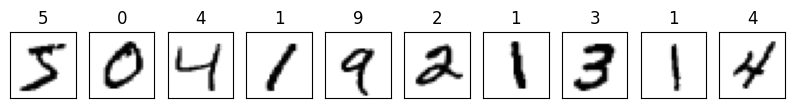

In [49]:
# one hot encode outputs 
y_train = to_categorical(y_train) 
y_test = to_categorical(y_test) 
num_classes = y_test.shape[1] 
(x_train, y_train1), (x_test, y_test1) = mnist.load_data() 
fig, ax = plt.subplots(1, 10, figsize=(10,10)) 
for i in range(0, 10): 
	ax[i].xaxis.set_visible(False) 
	ax[i].yaxis.set_visible(False) 
	ax[i].set_title(y_train1[i]) 
	ax[i].imshow(x_train[i], cmap=plt.cm.binary) 

def baseline_model(): 
	# create model 
	model = Sequential() 
	model.add(Convolution2D(32, (3, 3), padding= 'valid' ,strides=(1,1), input_shape=( 28, 28,1), activation= 'relu' )) 
	model.add(MaxPooling2D(pool_size=(2, 2))) 
	model.add(Dropout(0.2)) 
	model.add(Flatten())
	model.add(Dense(1024, activation= 'relu' ))
	model.add(Dense(512, activation= 'relu' )) 
	model.add(Dense(256, activation= 'relu' )) 
	model.add(Dense(128, activation= 'sigmoid' )) 
	model.add(Dense(10, activation= 'softmax' )) 
	
 	# Compile model 
	model.compile(loss= 'categorical_crossentropy' , optimizer= 'rmsprop' , metrics=[ 'accuracy' ]) 
	return model 

In [50]:
model = baseline_model() 
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2) 
scores = model.evaluate(X_test, y_test, verbose=0) 
print("CNN Error: %.2f%%" % (100-scores[1]*100)) #

Epoch 1/10
300/300 - 3s - loss: 0.4038 - accuracy: 0.8716 - val_loss: 0.0940 - val_accuracy: 0.9714 - 3s/epoch - 11ms/step
Epoch 2/10
300/300 - 2s - loss: 0.0812 - accuracy: 0.9763 - val_loss: 0.0534 - val_accuracy: 0.9824 - 2s/epoch - 8ms/step
Epoch 3/10
300/300 - 2s - loss: 0.0487 - accuracy: 0.9853 - val_loss: 0.0545 - val_accuracy: 0.9825 - 2s/epoch - 6ms/step
Epoch 4/10
300/300 - 2s - loss: 0.0339 - accuracy: 0.9896 - val_loss: 0.0355 - val_accuracy: 0.9890 - 2s/epoch - 7ms/step
Epoch 5/10
300/300 - 2s - loss: 0.0222 - accuracy: 0.9936 - val_loss: 0.0408 - val_accuracy: 0.9865 - 2s/epoch - 6ms/step
Epoch 6/10
300/300 - 2s - loss: 0.0165 - accuracy: 0.9948 - val_loss: 0.0404 - val_accuracy: 0.9885 - 2s/epoch - 6ms/step
Epoch 7/10
300/300 - 2s - loss: 0.0130 - accuracy: 0.9963 - val_loss: 0.0396 - val_accuracy: 0.9886 - 2s/epoch - 6ms/step
Epoch 8/10
300/300 - 2s - loss: 0.0100 - accuracy: 0.9969 - val_loss: 0.0467 - val_accuracy: 0.9878 - 2s/epoch - 6ms/step
Epoch 9/10
300/300 - 2s